In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [ ]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module4/course/module5_course_handling_duplicate_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module4/course/module5_course_handling_duplicate_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module5_course_handling_duplicate_train.csv')
download_file(test_data_url, 'module5_course_handling_duplicate_test.csv')

In [2]:
df_train = pd.read_csv("module5_course_handling_duplicate_train.csv")
df_test = pd.read_csv("module5_course_handling_duplicate_test.csv")

## Data Analysis

In [9]:
df.head()

,id,station_id,Date,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
0,1004,2,2018-02-26,67.969373,60.388810,55.225714,55.104789,59.387960,54.756166,96.853865,80.598458,60.207305,12.935215,7.712413,5.116875,30.668983,28.960075,29.629091,1.012362
1,196,2,2016-09-17,95.948601,88.050195,78.075118,83.052731,72.894391,76.959174,100.000000,85.432151,48.032289,8.694016,2.926433,0.000000,27.286810,29.300076,29.476171,0.010421
2,1618,2,2019-03-03,64.492885,51.923724,44.047472,63.844377,52.230213,37.018404,100.000000,92.927996,77.405888,24.506589,11.785035,0.000000,28.800923,27.541369,30.946841,0.077232
3,1708,2,2019-04-29,96.537128,79.610470,63.832148,78.172585,68.295921,66.613207,88.500668,73.561713,60.270858,19.795213,12.432935,4.878249,30.063147,27.581128,26.625135,0.000000
4,435,2,2017-03-08,100.154854,77.665061,79.272763,75.550870,74.056270,73.903439,98.145218,84.274033,57.868917,12.908236,5.283480,2.816518,28.923668,32.502365,31.766098,0.094555


In [3]:
df = df_train.copy()

Total duplicates: 744


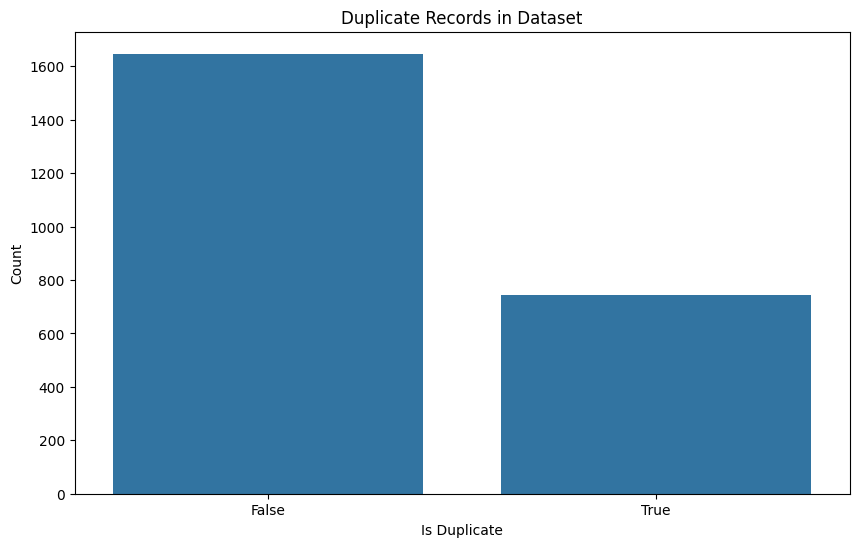

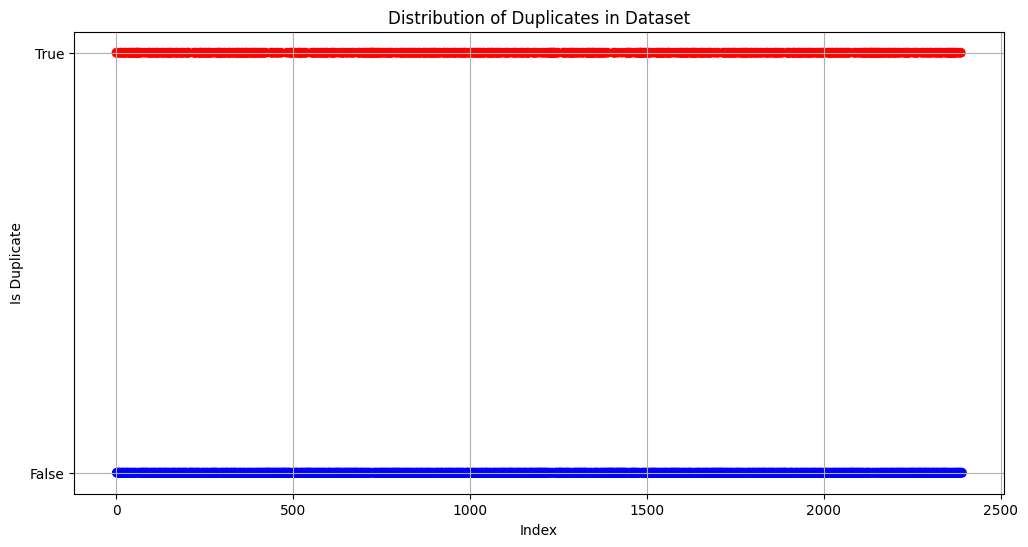

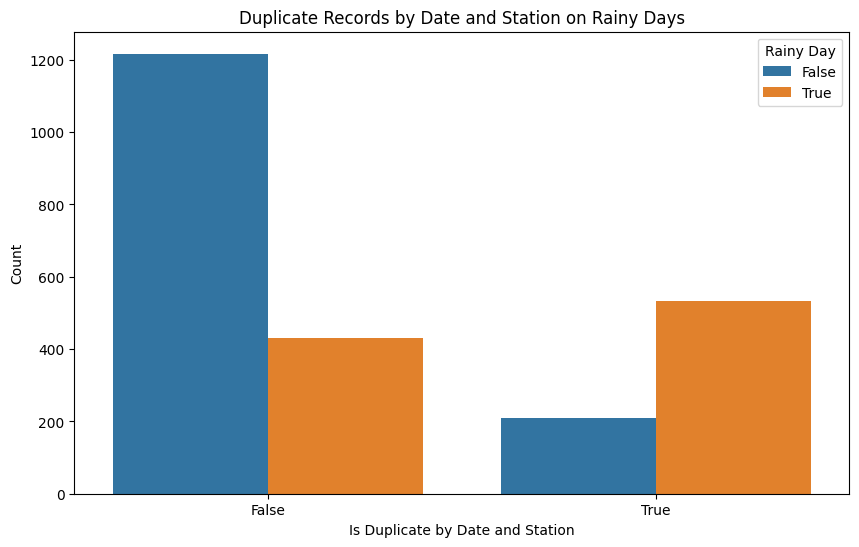

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Identify duplicates
# Adding a new column that flags duplicates based on all columns
# Identify duplicates based on all columns or specific columns
df['is_duplicate'] = df.duplicated(keep=False)

# Count of duplicates
print("Total duplicates:", df['is_duplicate'].sum())

# Visualization of duplicates
plt.figure(figsize=(10, 6))
sns.countplot(x='is_duplicate', data=df)
plt.title('Duplicate Records in Dataset')
plt.xlabel('Is Duplicate')
plt.ylabel('Count')
plt.show()

# Fixing the scatter plot error by removing 'hue' and 'style' that caused the problem
plt.figure(figsize=(12, 6))
plt.scatter(x=df.index, y=df['is_duplicate'].map({True: 1, False: 0}), c=['red' if x else 'blue' for x in df['is_duplicate']], marker='o')
plt.title('Distribution of Duplicates in Dataset')
plt.xlabel('Index')
plt.ylabel('Is Duplicate')
plt.yticks([0, 1], ['False', 'True'])
plt.grid(True)
plt.show()

# Explore duplicates related to 'Date' and 'Station_ID', especially on rainy days
# Define rainy days as days with Precipit greater than a threshold, e.g., 0.1mm
rainy_days_threshold = 0.1
df['rainy_day'] = df['Precipit'] > rainy_days_threshold

# Identify duplicates by 'Date' and 'Station_ID'
df['date_station_duplicate'] = df.duplicated(subset=['Date', 'station_id'], keep=False)

# Visualization of date and station duplicates, especially on rainy days
plt.figure(figsize=(10, 6))
sns.countplot(x='date_station_duplicate', hue='rainy_day', data=df)
plt.title('Duplicate Records by Date and Station on Rainy Days')
plt.xlabel('Is Duplicate by Date and Station')
plt.ylabel('Count')
plt.legend(title='Rainy Day')
plt.show()

# Cleaning up by removing the added columns after analysis
df.drop(columns=['is_duplicate', 'rainy_day', 'date_station_duplicate'], inplace=True)

## Data Cleaning - handling duplicate

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def prepare_data(df, drop_cols, target):
    """
    Prepare the dataset by dropping specified columns and splitting into features and target.
    
    Parameters:
        df (DataFrame): The DataFrame to process.
        drop_cols (list): List of columns to drop from the DataFrame.
        target (str): The target variable name.

    Returns:
        X (DataFrame): Features DataFrame.
        y (Series): Target variable Series.
    """
    df_ = df.drop(drop_cols, axis=1)
    X = df_.drop(target, axis=1)
    y = df_[target]
    return X, y

def train_and_evaluate(X_train, y_train, X_test, y_test):
    """
    Train a Linear Regression model and evaluate it using mean absolute error.
    
    Parameters:
        X_train (DataFrame): Training features.
        y_train (Series): Training target.
        X_test (DataFrame): Testing features.
        y_test (Series): Testing target.

    Returns:
        float: The mean absolute error of the predictions.
    """
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    return mean_absolute_error(y_test, y_pred)

# Handling duplicates with different strategies
# Strategy 1: No handling of duplicates
X_train, y_train = prepare_data(df_train, ['Date', 'id'], 'Precipit')
X_test, y_test = prepare_data(df_test, ['Date', 'id'], 'Precipit')
mae_no_duplicates_handled = train_and_evaluate(X_train, y_train, X_test, y_test)

# Strategy 2: Drop all duplicates
df_train_deduped = df_train.drop_duplicates()
X_train, y_train = prepare_data(df_train_deduped, ['Date', 'id'], 'Precipit')
X_test, y_test = prepare_data(df_test, ['Date', 'id'], 'Precipit')
mae_all_duplicates_dropped = train_and_evaluate(X_train, y_train, X_test, y_test)

# Strategy 3: Drop duplicates based on 'Date' only
df_train_date_deduped = df_train.drop_duplicates(subset=['Date'])
X_train, y_train = prepare_data(df_train_date_deduped, ['Date', 'id'], 'Precipit')
X_test, y_test = prepare_data(df_test, ['Date', 'id'], 'Precipit')
mae_date_duplicates_dropped = train_and_evaluate(X_train, y_train, X_test, y_test)

# Print mean absolute errors for each strategy
print(f"MAE without handling duplicates: {mae_no_duplicates_handled}")
print(f"MAE with all duplicates dropped: {mae_all_duplicates_dropped}")
print(f"MAE with date-based duplicates dropped: {mae_date_duplicates_dropped}")


MAE without handling duplicates: 0.5040567558693914
MAE with all duplicates dropped: 0.46979054660143105
MAE with date-based duplicates dropped: 0.40808520627546363
